In [76]:
import datetime
import GetOldTweets3 as got
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import tweepy
import random
import sys
import re
import string
import json
import os

In [77]:
def getStockDetails(stockname,start_time,end_time):
  company = yf.Ticker(stockname)
  company.info.get("longName")
  stockData = yf.download(stockname, start=start_time, end=end_time)
  print("\n Stock Data Obtained ")
  print(stockData.head())
  print("\n")
  plt.figure(figsize=(12,5))
  plt.title('Closing price for ' + company.info.get("longName"))
  plt.plot(stockData["Close"])
  plt.show()
  print("\n")
  stockData.to_csv('stockData_' + stockname + '.csv')

[*********************100%***********************]  1 of 1 completed

 Stock Data Obtained 
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-04-01  174.029999  174.880005  171.940002  174.309998  174.309998   
2022-04-04  174.570007  178.490005  174.440002  178.440002  178.440002   
2022-04-05  177.500000  178.300003  174.419998  175.059998  175.059998   
2022-04-06  172.360001  173.630005  170.130005  171.830002  171.830002   
2022-04-07  171.160004  173.360001  169.850006  172.139999  172.139999   

              Volume  
Date                  
2022-04-01  78699800  
2022-04-04  76468400  
2022-04-05  73401800  
2022-04-06  89058800  
2022-04-07  77594700  




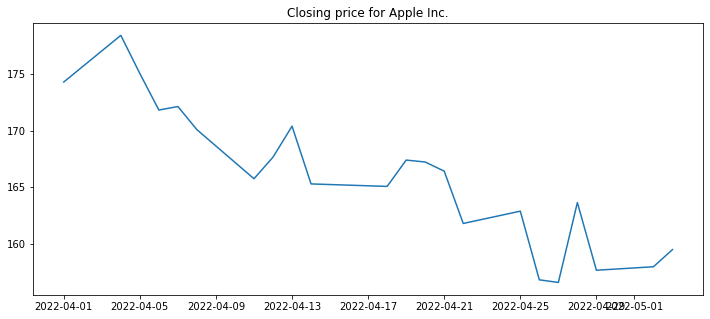

In [78]:
getStockDetails("AAPL", "2022-04-01","2022-05-04")

In [79]:
df = pd.read_csv("stockData_AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-01,174.029999,174.880005,171.940002,174.309998,174.309998,78699800
1,2022-04-04,174.570007,178.490005,174.440002,178.440002,178.440002,76468400
2,2022-04-05,177.500000,178.300003,174.419998,175.059998,175.059998,73401800
3,2022-04-06,172.360001,173.630005,170.130005,171.830002,171.830002,89058800
4,2022-04-07,171.160004,173.360001,169.850006,172.139999,172.139999,77594700
5,2022-04-08,171.779999,171.779999,169.199997,170.089996,170.089996,76515900
6,2022-04-11,168.710007,169.029999,165.500000,165.750000,165.750000,72246700
7,2022-04-12,168.020004,169.869995,166.639999,167.660004,167.660004,79265200
8,2022-04-13,167.389999,171.039993,166.770004,170.399994,170.399994,70618900
9,2022-04-14,170.619995,171.270004,165.039993,165.289993,165.289993,75237500


In [80]:
df.drop("Adj Close", axis = 1, inplace = True)

In [81]:
df.to_csv("stockData_AAPL.csv", index = False)

In [82]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt


In [83]:

consumer_key = "XFwhNbSbOuDOQfnh5gfkmgE0i"
consumer_secret = "jguuqolPxbYEDkyXDWS5OMp8CgvtmLbi96WzhJZSdmdePC0D8G"
access_token = "1514345354010931200-YiySo0R2FVqzQrK7rqX961aK166eDB"
access_token_secret = "76tcK6MvkhqwjHmBIgUDpvXPW9cMqlKVhH6Omm5iD8f2t"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [84]:
fetch_tweets=tweepy.Cursor(api.search_tweets, q="#AAPL",count=100, lang ="en", tweet_mode="extended").items()
data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])


In [85]:
data

,Date,Tweets
0,2022-05-04,$AAPL seeing sustained chatter on wallstreetbe...
1,2022-05-04,"@MadMoneyOnCNBC So, what do we do with #AAPL n..."
2,2022-05-04,RT @__ShoNuff_: $SPY been trading in a $5 rang...
3,2022-05-04,$SPY been trading in a $5 range. I'm waiting f...
4,2022-05-04,This Correction is not even close to being ove...
...,...,...
782,2022-04-26,#AAPL #Short\n\nNext we gotta breakthrough 159...
783,2022-04-26,#AAPL #Short \n\nTake Profit : $158.20
784,2022-04-26,The market will wake up later and see Big Tech...
785,2022-04-26,BIG BEARS / Initiative Sellers going to work o...


In [86]:
data.to_csv("Tweets.csv")
clean_data=pd.DataFrame(columns=['Date','Tweets'])
total=100
i=0
for index,row in data.iterrows():
    sub=row["Tweets"]
    new = re.sub('[^ a-zA-Z0-9]', '', sub)
    tmp = pd.DataFrame([[data["Date"].iloc[index], new]], columns = ['Date','Tweets'])
    clean_data = pd.concat([clean_data, tmp], axis = 0).reset_index(drop = True)


In [87]:
clean_data.to_csv("cd.csv")

In [88]:
cleanData=pd.DataFrame(columns=['Date','Tweets'])


In [89]:
index=0
get_tweet=""
for i in range(0,len(clean_data)-1):
    get_date=clean_data.Date.iloc[i]
    next_date=clean_data.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+clean_data.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        tmp = pd.DataFrame([[get_date, get_tweet]], columns = ['Date','Tweets'])
        cleanData = pd.concat([cleanData, tmp], axis = 0).reset_index(drop = True)
        get_tweet=" "

In [90]:
cleanData.to_csv("ccd.csv")

In [91]:
df=pd.read_csv('stockData_AAPL.csv')

df


,Date,Open,High,Low,Close,Volume
0,2022-04-01,174.029999,174.880005,171.940002,174.309998,78699800
1,2022-04-04,174.570007,178.490005,174.440002,178.440002,76468400
2,2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800
3,2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800
4,2022-04-07,171.160004,173.360001,169.850006,172.139999,77594700
5,2022-04-08,171.779999,171.779999,169.199997,170.089996,76515900
6,2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700
7,2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200
8,2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900
9,2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500


In [92]:
cleanData['Prices']=""
index=0
for i in range (0,len(cleanData)):
    for j in range (0,len(df)):
        tweet_date=cleanData.Date.iloc[i]
        stock_date=df.Date.iloc[j]
        if(str(stock_date)==str(tweet_date)):
            cleanData['Prices'].iloc[i] = int(df.Close[j])

In [93]:
cleanData

,Date,Tweets,Prices
0,2022-05-04,AAPL seeing sustained chatter on wallstreetbet...,
1,2022-05-03,RT CIAZEKACTrader 53 Recap of actionable aler...,159
2,2022-05-02,NAMO MACD looking like a bullish reversalcont...,157
3,2022-05-01,spy SPY SPX SPX QQQ QQQ ES ES NQ NQ NDX NDX V...,
4,2022-04-30,Tried to sell aapl last Friday 042922 First s...,
5,2022-04-29,Started out as a dollar coat average dude wit...,157
6,2022-04-28,Apple shares dip after company warns of a pos...,163
7,2022-04-27,Im an AAPL investor and I support thishttpstc...,156


In [94]:
mean=0
summ=0
count=0
for i in range(0,len(cleanData)):
    if (cleanData.Prices.iloc[i] != ""):
        summ=summ+int(cleanData.Prices.iloc[i])
        count+=1
mean=summ/count
for i in range(0,len(cleanData)):
    if(cleanData.Prices.iloc[i] == ""):
        cleanData.Prices.iloc[i]=int(mean)

In [95]:
cleanData

,Date,Tweets,Prices
0,2022-05-04,AAPL seeing sustained chatter on wallstreetbet...,158
1,2022-05-03,RT CIAZEKACTrader 53 Recap of actionable aler...,159
2,2022-05-02,NAMO MACD looking like a bullish reversalcont...,157
3,2022-05-01,spy SPY SPX SPX QQQ QQQ ES ES NQ NQ NDX NDX V...,158
4,2022-04-30,Tried to sell aapl last Friday 042922 First s...,158
5,2022-04-29,Started out as a dollar coat average dude wit...,157
6,2022-04-28,Apple shares dip after company warns of a pos...,163
7,2022-04-27,Im an AAPL investor and I support thishttpstc...,156


In [96]:
cleanData['Prices'] = cleanData['Prices'].apply(np.int64)
cleanData["Comp"] = ""
cleanData["Positive"] = ""
cleanData["Negative"] = ""
cleanData["Neutral"] = ""

cleanData

,Date,Tweets,Prices,Comp,Positive,Negative,Neutral
0,2022-05-04,AAPL seeing sustained chatter on wallstreetbet...,158,,,,
1,2022-05-03,RT CIAZEKACTrader 53 Recap of actionable aler...,159,,,,
2,2022-05-02,NAMO MACD looking like a bullish reversalcont...,157,,,,
3,2022-05-01,spy SPY SPX SPX QQQ QQQ ES ES NQ NQ NDX NDX V...,158,,,,
4,2022-04-30,Tried to sell aapl last Friday 042922 First s...,158,,,,
5,2022-04-29,Started out as a dollar coat average dude wit...,157,,,,
6,2022-04-28,Apple shares dip after company warns of a pos...,163,,,,
7,2022-04-27,Im an AAPL investor and I support thishttpstc...,156,,,,


In [97]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
SIA = SentimentIntensityAnalyzer()
for i, row in cleanData.T.iteritems():
    try:
        sen = unicodedata.normalize('NFKD', cleanData.loc[i, 'Tweets'])
        sentiment = SIA.polarity_scores(sen)
        cleanData['Comp'].iloc[i] = sentiment['compound']
        cleanData['Positive'].iloc[i] = sentiment['pos']
        cleanData['Negative'].iloc[i] = sentiment['neg']
        cleanData['Neutral'].iloc[i] = sentiment['neu']
        

    except TypeError:
        print (stocks_dataf.loc[i, 'Tweets'])
        print (i)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/julianlam/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/Users/julianlam/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [98]:
cleanData

,Date,Tweets,Prices,Comp,Positive,Negative,Neutral
0,2022-05-04,AAPL seeing sustained chatter on wallstreetbet...,158,0.9858,0.081,0.029,0.891
1,2022-05-03,RT CIAZEKACTrader 53 Recap of actionable aler...,159,-0.4299,0.055,0.051,0.894
2,2022-05-02,NAMO MACD looking like a bullish reversalcont...,157,0.9978,0.101,0.059,0.84
3,2022-05-01,spy SPY SPX SPX QQQ QQQ ES ES NQ NQ NDX NDX V...,158,0.4537,0.034,0.03,0.936
4,2022-04-30,Tried to sell aapl last Friday 042922 First s...,158,0.9947,0.099,0.043,0.858
5,2022-04-29,Started out as a dollar coat average dude wit...,157,0.9983,0.113,0.081,0.806
6,2022-04-28,Apple shares dip after company warns of a pos...,163,0.9995,0.1,0.07,0.83
7,2022-04-27,Im an AAPL investor and I support thishttpstc...,156,0.0441,0.06,0.059,0.882


% of positive tweets=  87.5
% of negative tweets=  12.5
% of neutral tweets=  0.0


[]

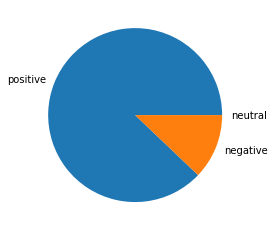

In [99]:
pos=0
neg=0
neu=0
for i in range (0,len(cleanData)):
    get_val=cleanData.Comp[i]
    if(float(get_val)<(0)):
        neg+=1
    if(float(get_val>(0))):
        pos+=1
    if(float(get_val==(0))):
        neu+=1
    
posper=(pos/(len(cleanData)))*100
negper=(neg/(len(cleanData)))*100
neuper=(neu/(len(cleanData)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
print("% of neutral tweets= ",neuper)
arr=np.asarray([posper,negper,neuper], dtype=int)
mlpt.pie(arr,labels=['positive','negative','neutral'])
mlpt.plot()



In [100]:
newDf=cleanData[['Date','Prices','Comp','Positive','Negative','Neutral']].copy()
newDf

,Date,Prices,Comp,Positive,Negative,Neutral
0,2022-05-04,158,0.9858,0.081,0.029,0.891
1,2022-05-03,159,-0.4299,0.055,0.051,0.894
2,2022-05-02,157,0.9978,0.101,0.059,0.84
3,2022-05-01,158,0.4537,0.034,0.03,0.936
4,2022-04-30,158,0.9947,0.099,0.043,0.858
5,2022-04-29,157,0.9983,0.113,0.081,0.806
6,2022-04-28,163,0.9995,0.1,0.07,0.83
7,2022-04-27,156,0.0441,0.06,0.059,0.882


In [101]:
train_start = '0'
train_end = '5'
test_start = '6'
test_end= '8'
train = newDf.loc[train_start: train_end,:]
test = newDf.loc[test_start:test_end,:]

In [102]:
score = []
for date, row in train.T.iteritems():
    s = np.asarray([newDf.loc[date, 'Positive'],newDf.loc[date, 'Negative']])
    score.append(s)
df_train = np.asarray(score)
print(df_train)
score = []
for date, row in test.T.iteritems():
    s = np.asarray([newDf.loc[date, 'Positive'],newDf.loc[date, 'Negative']])
    score.append(s)
df_test = np.asarray(score)
print(df_test)

[[0.081 0.029]
 [0.055 0.051]
 [0.101 0.059]
 [0.034 0.03 ]
 [0.099 0.043]
 [0.113 0.081]]
[[0.1   0.07 ]
 [0.06  0.059]]


In [103]:
y_train = pd.DataFrame(train['Prices'])

y_test = pd.DataFrame(test['Prices'])



In [104]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(df_train, y_train)

/var/folders/8h/3y5gzzz57c35nrp3mh9qhq8c0000gn/T/ipykernel_49504/2210407446.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train, y_train)


RandomForestRegressor()

In [105]:
import matplotlib.pyplot as plt
prediction = rf.predict(df_test)
i=np.arange(int(test_start),int(test_end))
predict = pd.DataFrame(data=prediction[0:], index = i, columns=['Prices'])
predict

,Prices
6,157.35
7,157.86


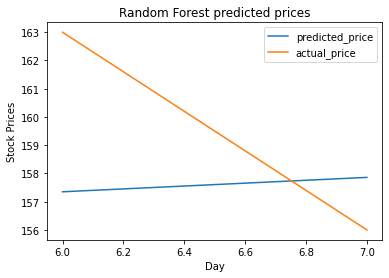

In [106]:
ax = predict.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Day")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value

